In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('files/sample_submission.csv', index_col='id')
df

,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
id,,,,,,,,,,,,,,,,,,,,,
0,8.59,7.500,9.000,9.545,9.265,8.110,8.430,7.150,0.180,0.200,...,4.950,1.730,1.800,4.800,3.150,10.665,10.465,16.645,5.750,10.37
1,9.10,13.533,40.900,8.770,9.265,6.015,10.070,7.150,1.107,1.027,...,20.050,9.530,7.695,4.550,6.950,2.040,5.200,5.725,2.950,2.23
2,8.21,3.710,5.420,8.770,9.265,4.550,10.070,7.150,0.020,0.020,...,4.580,3.025,3.960,4.935,4.950,4.725,6.075,6.750,3.500,3.17
3,8.39,8.700,8.100,9.500,9.200,5.200,8.670,6.670,0.280,0.270,...,8.450,2.070,1.730,6.300,4.700,3.500,6.200,8.670,2.900,7.37
4,8.07,8.050,8.650,7.960,9.265,3.290,10.070,7.150,0.360,0.435,...,2.020,1.730,0.760,4.800,4.970,3.950,2.800,8.400,3.500,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,8.08,6.250,8.300,7.795,9.265,5.690,8.555,6.335,0.565,0.565,...,14.575,0.636,1.640,4.235,4.100,2.800,3.950,7.695,3.540,2.50
3496,8.09,6.630,6.630,8.370,7.600,0.636,8.430,7.150,1.300,2.200,...,4.580,1.730,1.800,4.900,3.150,2.040,6.075,8.415,2.155,2.90
3497,9.95,8.367,8.433,8.770,6.170,5.800,10.400,7.200,0.430,0.400,...,20.050,1.440,1.800,4.867,4.833,4.725,4.950,8.400,6.625,4.20


In [3]:
df.isna().sum()

target    0
O2_1      0
O2_2      0
O2_3      0
O2_4      0
O2_5      0
O2_6      0
O2_7      0
NH4_1     0
NH4_2     0
NH4_3     0
NH4_4     0
NH4_5     0
NH4_6     0
NH4_7     0
NO2_1     0
NO2_2     0
NO2_3     0
NO2_4     0
NO2_5     0
NO2_6     0
NO2_7     0
NO3_1     0
NO3_2     0
NO3_3     0
NO3_4     0
NO3_5     0
NO3_6     0
NO3_7     0
BOD5_1    0
BOD5_2    0
BOD5_3    0
BOD5_4    0
BOD5_5    0
BOD5_6    0
BOD5_7    0
dtype: int64

In [4]:
df.describe()

,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,8.473834,8.216993,9.291581,9.633064,8.065733,5.671581,9.461363,6.547433,0.340525,0.397956,...,8.710466,3.002243,3.242654,4.816718,4.754389,4.285660,5.968980,7.837995,3.750349,4.068639
std,1.885712,3.040743,6.817822,1.439039,1.463881,2.721399,1.140365,1.663266,0.284751,0.452237,...,6.438648,2.918355,2.713923,2.009161,1.547491,2.093388,2.576146,3.724861,1.682421,1.894632
min,1.300000,0.000000,0.000000,4.900000,2.300000,0.200000,0.000000,0.000000,0.020000,0.020000,...,0.044000,0.011000,0.000000,0.570000,0.089000,0.850000,2.025000,2.020000,0.364000,1.600000
25%,7.470000,7.100000,7.300000,8.770000,6.830000,4.550000,8.980000,5.877500,0.214500,0.200000,...,4.450000,1.140000,1.780000,3.520000,3.950000,2.290000,4.950000,5.725000,2.684000,2.900000
50%,8.280000,7.890000,8.300000,9.500000,7.980000,5.800000,9.430000,6.430000,0.247000,0.245000,...,6.054000,1.730000,1.800000,4.600000,4.800000,3.950000,5.725000,7.500000,3.500000,3.700000
75%,9.110000,9.100000,8.700000,9.545000,9.265000,7.015000,10.070000,7.150000,0.370000,0.405000,...,14.515000,3.025000,4.237500,5.000000,5.400000,4.725000,6.250000,8.400000,4.150000,4.450000
max,65.930000,46.950000,65.950000,16.900000,21.800000,59.400000,40.190000,15.900000,4.200000,3.600000,...,35.000000,19.355000,27.025000,11.650000,10.700000,19.800000,55.400000,82.450000,19.375000,10.370000


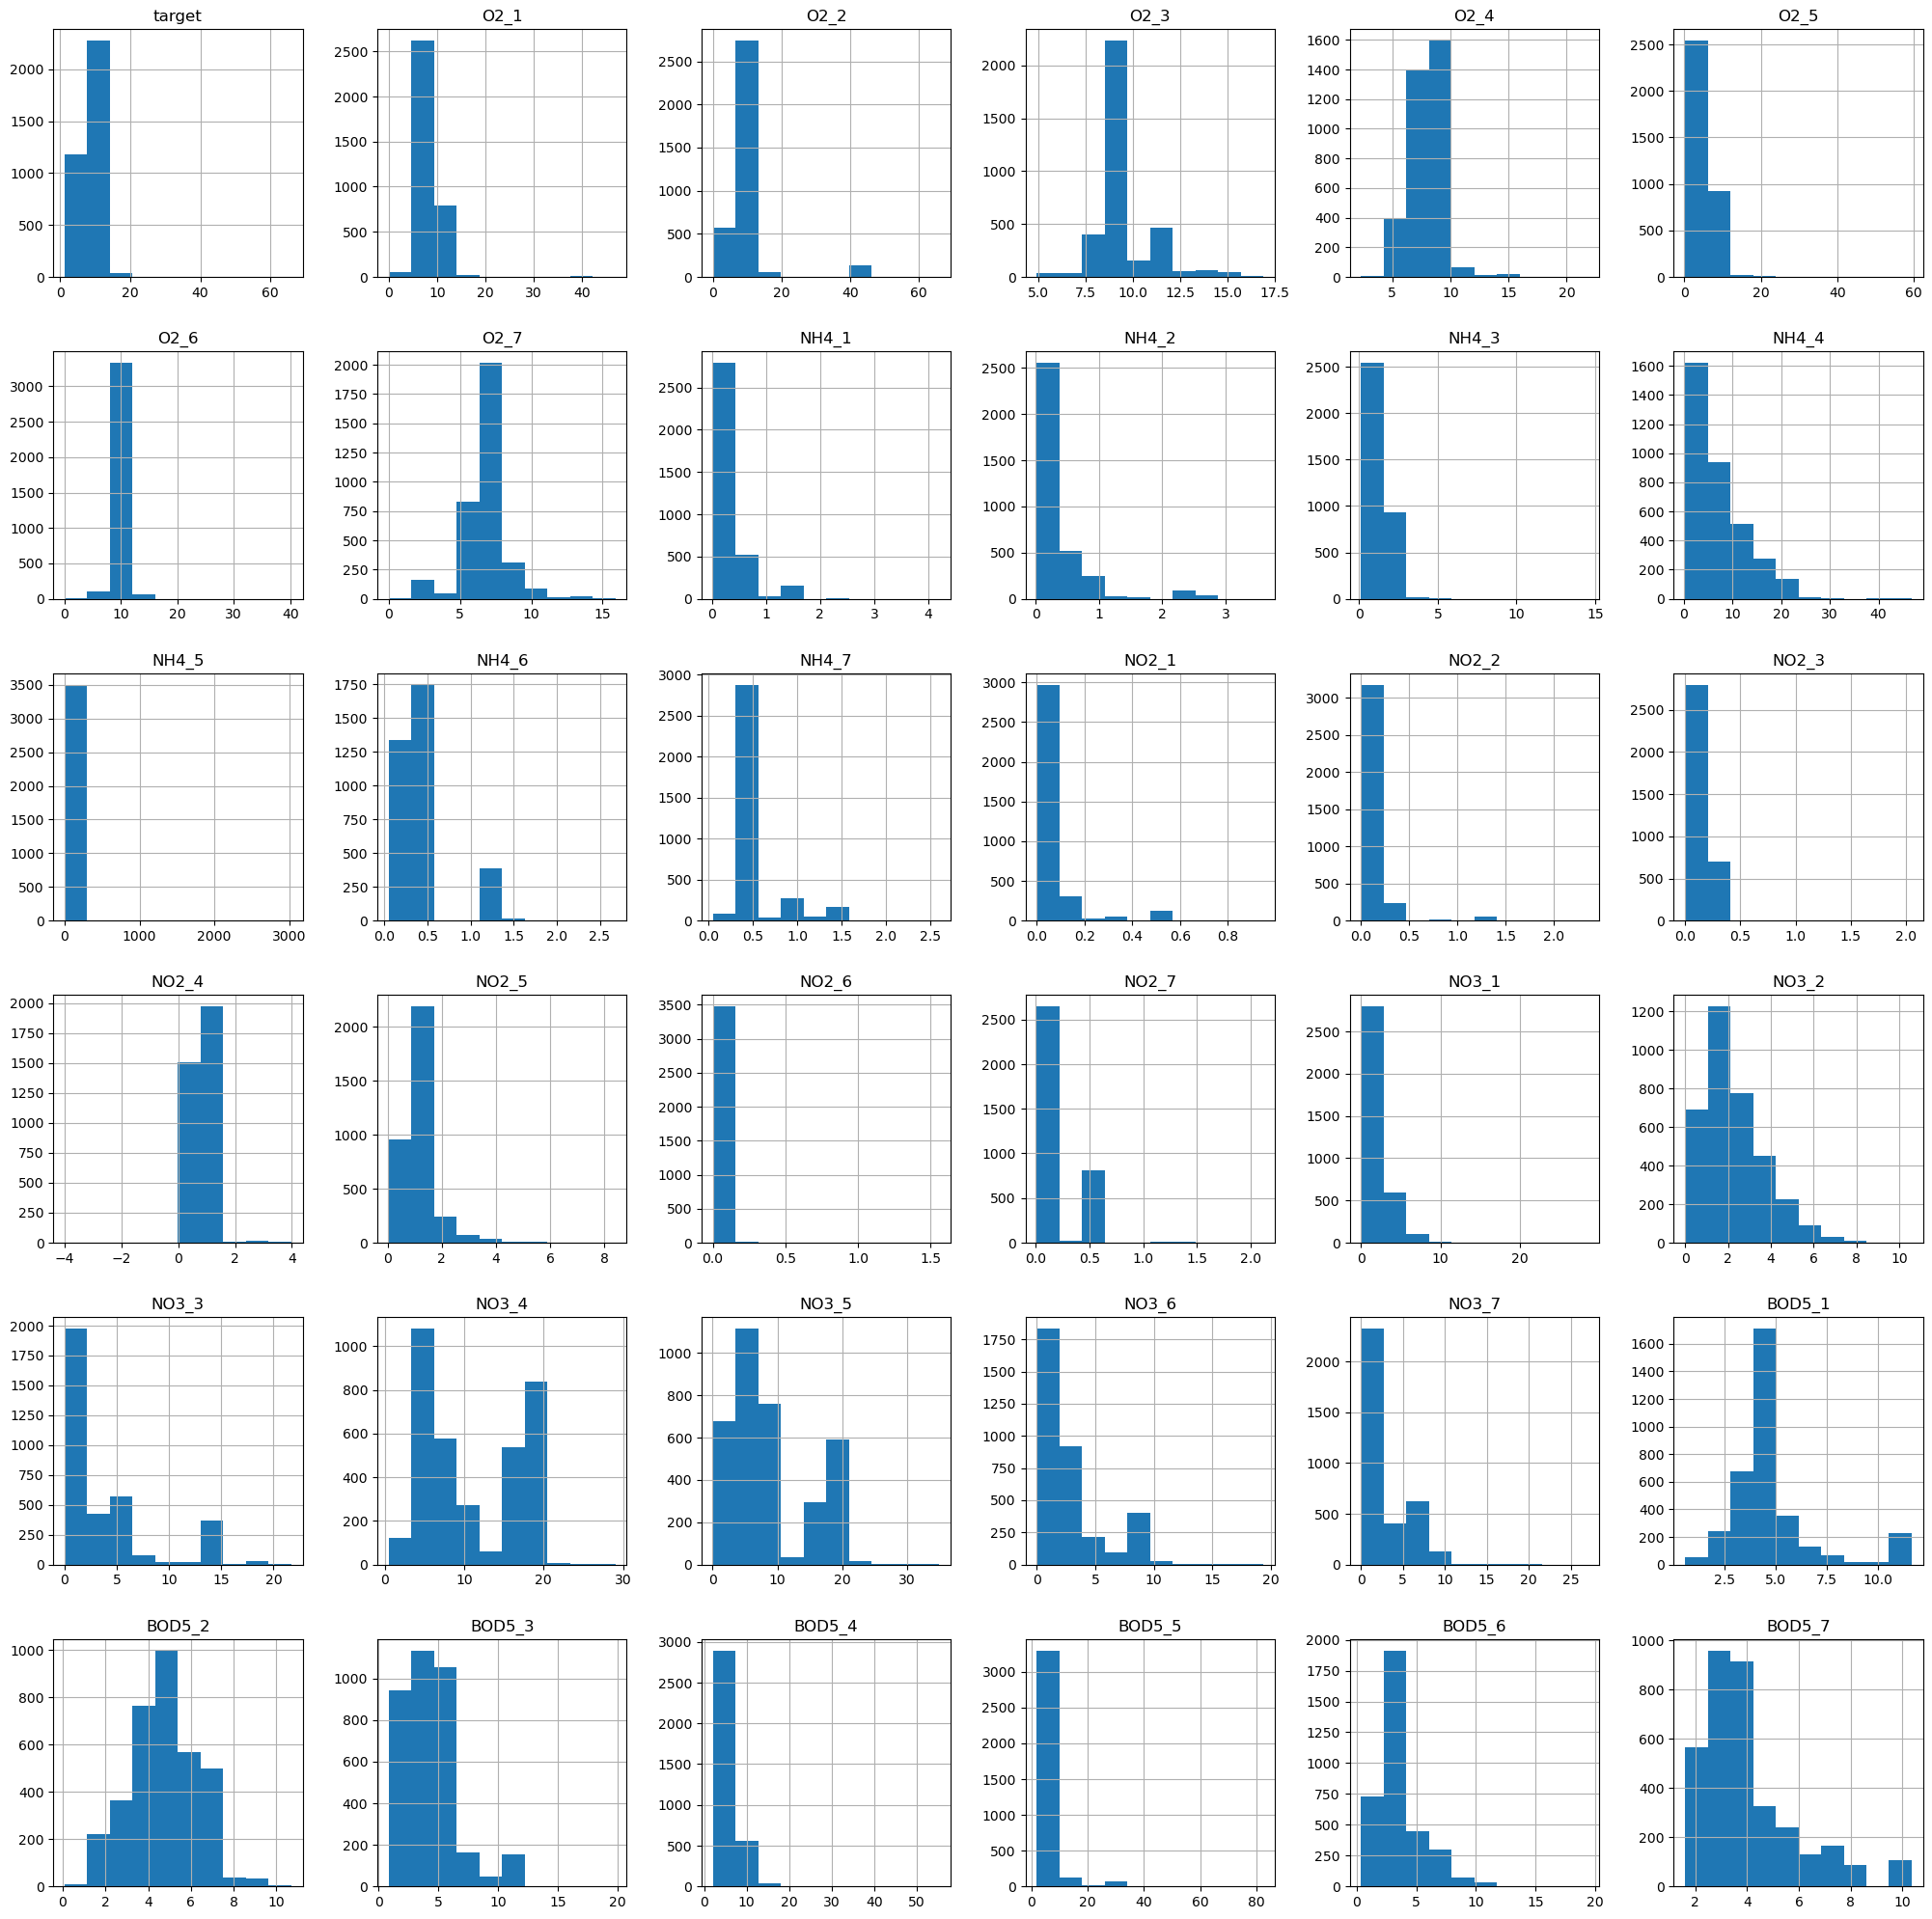

In [5]:
axs = df.hist(figsize=(25, 25))

<Axes: >

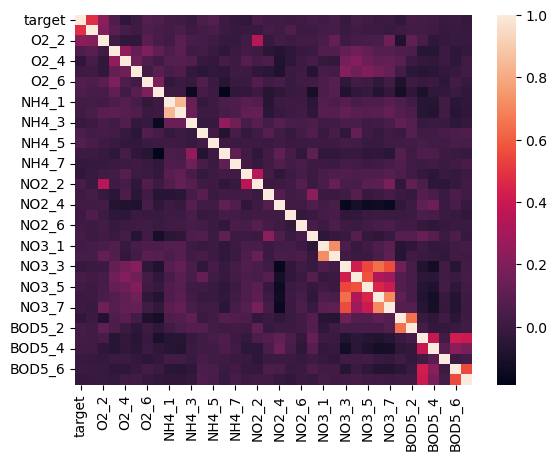

In [8]:
sns.heatmap(df.corr())

In [ ]:
y_train = train.pop('target') # train is your submission!

In [ ]:
rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)
rf.fit(train, y_train)

In [ ]:
y_hat = rf.predict(test) # test set is hidden from you